In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style='whitegrid')

In [2]:
DATA_DIR = "../data/"

In [3]:
a = np.array([
    [1625, 5],
    [1022, 11]
])
a

array([[1625,    5],
       [1022,   11]])

In [5]:
stats.chi2_contingency(a, correction=False)

(6.084865105188664,
 0.01363447772130584,
 1,
 array([[1620.20653398,    9.79346602],
        [1026.79346602,    6.20653398]]))

In [6]:
a = np.array([
    [10, 10],
    [10, 10]
])
stats.chi2_contingency(a, correction=False)

(0.0,
 1.0,
 1,
 array([[10., 10.],
        [10., 10.]]))

In [7]:
a = np.array([
    [10, 20, 30],
    [2, 4, 6]
])
stats.chi2_contingency(a, correction=False)

(0.0,
 1.0,
 2,
 array([[10., 20., 30.],
        [ 2.,  4.,  6.]]))

In [8]:
a = np.array([
    [25, 0],
    [0, 25]
])
stats.chi2_contingency(a, correction=False)

(50.0,
 1.537459794428033e-12,
 1,
 array([[12.5, 12.5],
        [12.5, 12.5]]))

# Мера Крамера

In [10]:
a = np.array([
    [12, 30],
    [8, 62]
])
chi2, p, r, _ = stats.chi2_contingency(a, correction=False)
chi2, p, r

(5.25913043478261, 0.021831924083021596, 1)

In [11]:
alpha = 0.05
if p  < alpha:
    print('HA')
else:
    print('H0')

HA


In [12]:
n = a.sum()
n

112

In [13]:
P = np.sqrt(chi2 / (chi2 + n))
P

0.2117793624007553

In [14]:
max_P = np.sqrt(n / (n + n))
max_P

0.7071067811865476

In [15]:
P / max_P

0.2995012465378748

In [16]:
C = np.sqrt(chi2 / n * min(2 - 1, 2 - 1))
C

0.2166945355543846

# Загрузка данных и формирование таблиц сопряженности

In [18]:
df = pd.read_csv(DATA_DIR + 'smoking.csv', sep=';')
df.head()

,Возраст,Пол,Должность,Курение
0,55,М,Ст. Менеджер,Да
1,28,Ж,Мл. Менеджер,Нет
2,27,М,Мл. Рабочий,Да
3,36,М,Ст. Рабочий,Да
4,50,Ж,Мл. Менеджер,Да


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Возраст    31 non-null     int64 
 1   Пол        31 non-null     object
 2   Должность  31 non-null     object
 3   Курение    31 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [20]:
df_sex_smoke = pd.crosstab(df['Пол'], df['Курение'])
df_sex_smoke

Курение,Да,Нет
Пол,,
Ж,3,11
М,13,4


In [21]:
chi2, p, _, _ = stats.chi2_contingency(df_sex_smoke, correction=False)
chi2, p

(9.313567927170869, 0.0022746309660361765)

In [24]:
df_sex_smoke.index

Index(['Ж', 'М'], dtype='object', name='Пол')

In [25]:
df_sex_smoke.columns

Index(['Да', 'Нет'], dtype='object', name='Курение')

In [27]:
m = len(df_sex_smoke.index)
k = len(df_sex_smoke.columns)
m, k

(2, 2)

In [31]:
df_sex_smoke.values

array([[ 3, 11],
       [13,  4]], dtype=int64)

In [30]:
n = df_sex_smoke.values.sum()
n

31

In [32]:
C = np.sqrt(chi2 / (n * min(m - 1, k - 1)))
C

0.5481219527349986

p-value = 0.00227 < 0.05 => гипотеза H0 отвергается в пользу альтернативы HA о наличии зависимости между признаками Пол и Курение, мера силы связи Крамера равна 0.55, что говорит об умеренной силе связи

In [33]:
df_pos_smoke = pd.crosstab(df['Должность'], df['Курение'])
df_pos_smoke

Курение,Да,Нет
Должность,,
Мл. Менеджер,4,3
Мл. Рабочий,3,4
Ст. Менеджер,4,1
Ст. Рабочий,5,7


In [35]:
stats.chi2_contingency(df_pos_smoke, correction=False)

(2.389275793650794,
 0.4956340523978574,
 3,
 array([[3.61290323, 3.38709677],
        [3.61290323, 3.38709677],
        [2.58064516, 2.41935484],
        [6.19354839, 5.80645161]]))

In [39]:
df['Должность'].head()

0    Ст. Менеджер
1    Мл. Менеджер
2     Мл. Рабочий
3     Ст. Рабочий
4    Мл. Менеджер
Name: Должность, dtype: object

In [44]:
df['Должность'].str.split('.').head()

0    [Ст,  Менеджер]
1    [Мл,  Менеджер]
2     [Мл,  Рабочий]
3     [Ст,  Рабочий]
4    [Мл,  Менеджер]
Name: Должность, dtype: object

In [50]:
df_pos_general = df['Должность'].str.split('.').apply(lambda x: x[1].strip())
df_pos_general.head()

0    Менеджер
1    Менеджер
2     Рабочий
3     Рабочий
4    Менеджер
Name: Должность, dtype: object

In [51]:
df_pos_level = df['Должность'].str.split('.').apply(lambda x: x[0].strip())
df_pos_level.head()

0    Ст
1    Мл
2    Мл
3    Ст
4    Мл
Name: Должность, dtype: object

In [55]:
df_smoke = pd.crosstab(df_pos_general, df['Курение'])
df_smoke

Курение,Да,Нет
Должность,,
Менеджер,8,4
Рабочий,8,11


In [56]:
stats.chi2_contingency(df_smoke, correction=False)

(1.7766081871345032,
 0.18256637369289758,
 1,
 array([[6.19354839, 5.80645161],
        [9.80645161, 9.19354839]]))

In [57]:
df_smoke = pd.crosstab(df_pos_level, df['Курение'])
df_smoke

Курение,Да,Нет
Должность,,
Мл,7,7
Ст,9,8


In [58]:
stats.chi2_contingency(df_smoke, correction=False)

(0.02659313725490201,
 0.8704601519619278,
 1,
 array([[7.22580645, 6.77419355],
        [8.77419355, 8.22580645]]))

In [59]:
df_smoke = pd.crosstab(df_pos_general, df['Курение'])
df_smoke

Курение,Да,Нет
Должность,,
Менеджер,8,4
Рабочий,8,11


In [60]:
stats.chi2_contingency(df_smoke, correction=False)

(1.7766081871345032,
 0.18256637369289758,
 1,
 array([[6.19354839, 5.80645161],
        [9.80645161, 9.19354839]]))

In [61]:
a = np.array([
    [80, 40],
    [80, 110]
])
stats.chi2_contingency(a, correction=False)

(17.766081871345026,
 2.497969810124812e-05,
 1,
 array([[61.93548387, 58.06451613],
        [98.06451613, 91.93548387]]))

# Работа с непрерывными переменными

In [63]:
df['Возраст'].head()

0    55
1    28
2    27
3    36
4    50
Name: Возраст, dtype: int64

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Возраст'>

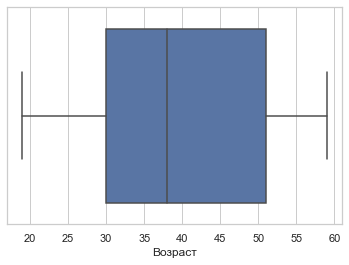

In [64]:
sns.boxplot(df['Возраст'])

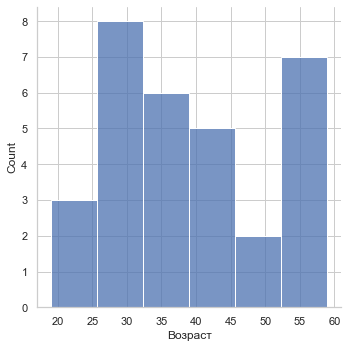

In [65]:
sns.displot(df['Возраст'])

## Equal-width

In [67]:
df['Возраст_cat'] = pd.cut(df['Возраст'], bins=3)
df['Возраст_cat'] 

0       (45.667, 59.0]
1      (18.96, 32.333]
2      (18.96, 32.333]
3     (32.333, 45.667]
4       (45.667, 59.0]
5     (32.333, 45.667]
6     (32.333, 45.667]
7     (32.333, 45.667]
8     (32.333, 45.667]
9     (32.333, 45.667]
10     (18.96, 32.333]
11      (45.667, 59.0]
12    (32.333, 45.667]
13      (45.667, 59.0]
14    (32.333, 45.667]
15     (18.96, 32.333]
16     (18.96, 32.333]
17      (45.667, 59.0]
18     (18.96, 32.333]
19     (18.96, 32.333]
20    (32.333, 45.667]
21      (45.667, 59.0]
22     (18.96, 32.333]
23      (45.667, 59.0]
24     (18.96, 32.333]
25      (45.667, 59.0]
26      (45.667, 59.0]
27    (32.333, 45.667]
28     (18.96, 32.333]
29     (18.96, 32.333]
30    (32.333, 45.667]
Name: Возраст_cat, dtype: category
Categories (3, interval[float64]): [(18.96, 32.333] < (32.333, 45.667] < (45.667, 59.0]]

In [69]:
df.describe()

,Возраст
count,31.000000
mean,39.548387
std,11.924313
min,19.000000
25%,30.000000
50%,38.000000
75%,51.000000
max,59.000000


C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Возраст_cat', ylabel='count'>

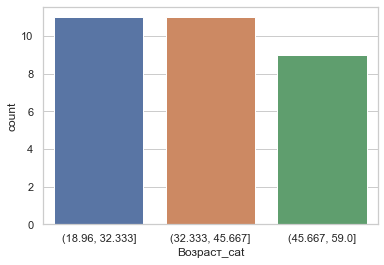

In [70]:
sns.countplot(df['Возраст_cat'])

In [71]:
pd.crosstab(df['Возраст_cat'], df['Курение'])

Курение,Да,Нет
Возраст_cat,,
"(18.96, 32.333]",6,5
"(32.333, 45.667]",5,6
"(45.667, 59.0]",5,4


C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Должность', ylabel='count'>

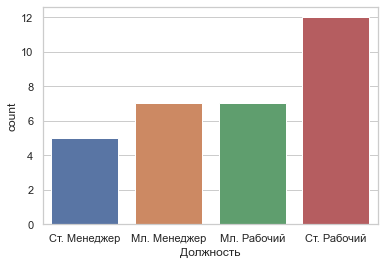

In [74]:
sns.countplot(df['Должность'])

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

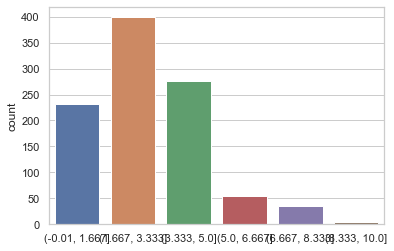

In [76]:
a = np.random.poisson(lam=3, size=1000)
dfa = pd.cut(a, bins=6)
sns.countplot(dfa)

## Equal-height

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

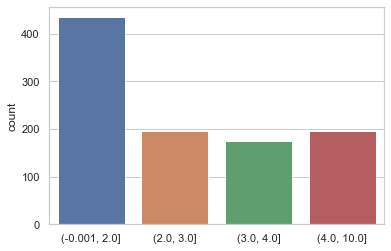

In [80]:
dfa = pd.qcut(a, q=4)
sns.countplot(dfa)

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Возраст_qcut', ylabel='count'>

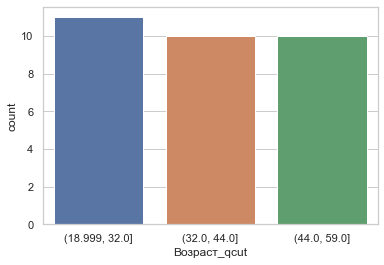

In [82]:
df['Возраст_qcut'] = pd.qcut(df['Возраст'], q=3)
sns.countplot(df['Возраст_qcut'])

In [84]:
df_smoke = pd.crosstab(df['Возраст_qcut'], df['Курение'])
df_smoke

Курение,Да,Нет
Возраст_qcut,,
"(18.999, 32.0]",6,5
"(32.0, 44.0]",5,5
"(44.0, 59.0]",5,5


In [85]:
stats.chi2_contingency(df_smoke, correction=False)

(0.0587121212121211,
 0.9710706429019011,
 2,
 array([[5.67741935, 5.32258065],
        [5.16129032, 4.83870968],
        [5.16129032, 4.83870968]]))

# Квадратичный пример

In [86]:
age = np.random.randint(20, 70, 40)
age

array([36, 64, 56, 30, 59, 39, 46, 68, 69, 55, 43, 69, 21, 40, 41, 26, 34,
       42, 52, 61, 59, 53, 33, 48, 45, 60, 22, 46, 45, 20, 25, 28, 58, 60,
       45, 33, 35, 54, 22, 54])

C:\python\3.9.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

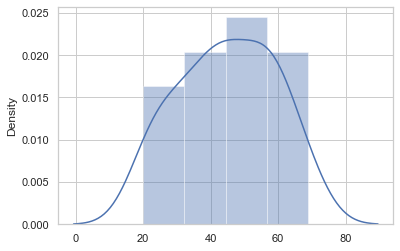

In [87]:
sns.distplot(age)

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

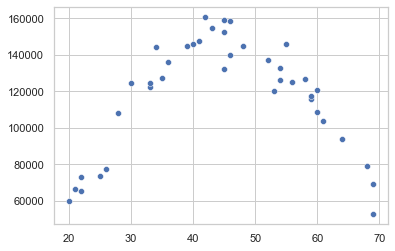

In [91]:
salary = 150_000 - 150 * (age - 45) ** 2 + np.random.normal(0, 8000, 40)
sns.scatterplot(age, salary)

In [92]:
stats.spearmanr(age, salary)

SpearmanrResult(correlation=0.012107561799028598, pvalue=0.9408915170008996)

In [93]:
age_cat = pd.qcut(age, 3)
salary_cat = pd.qcut(salary, 2)
age_cat

[(19.999, 39.0], (54.0, 69.0], (54.0, 69.0], (19.999, 39.0], (54.0, 69.0], ..., (19.999, 39.0], (19.999, 39.0], (39.0, 54.0], (19.999, 39.0], (39.0, 54.0]]
Length: 40
Categories (3, interval[float64]): [(19.999, 39.0] < (39.0, 54.0] < (54.0, 69.0]]

In [94]:
salary_cat

[(124906.472, 160816.76], (52631.411, 124906.472], (124906.472, 160816.76], (52631.411, 124906.472], (52631.411, 124906.472], ..., (52631.411, 124906.472], (124906.472, 160816.76], (124906.472, 160816.76], (52631.411, 124906.472], (124906.472, 160816.76]]
Length: 40
Categories (2, interval[float64]): [(52631.411, 124906.472] < (124906.472, 160816.76]]

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

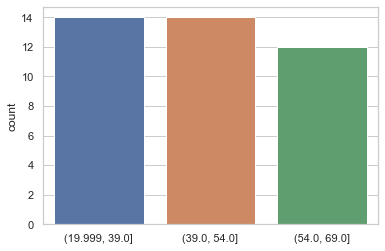

In [95]:
sns.countplot(age_cat)

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

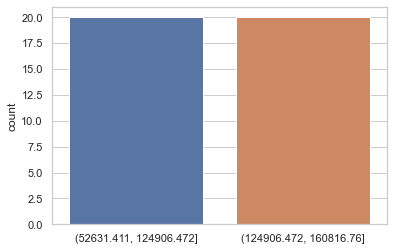

In [96]:
sns.countplot(salary_cat)

In [98]:
df_as = pd.crosstab(age_cat, salary_cat)
df_as

col_0,"(52631.411, 124906.472]","(124906.472, 160816.76]"
row_0,,
"(19.999, 39.0]",10,4
"(39.0, 54.0]",1,13
"(54.0, 69.0]",9,3


In [100]:
chi2, p, _, _ = stats.chi2_contingency(df_as, correction=False)
chi2, p

(15.857142857142858, 0.0003603007608242623)

In [101]:
n = df_as.values.sum()
n

40

In [103]:
m = len(df_as.index)
k = len(df_as.columns)
m, k

(3, 2)

In [104]:
C = np.sqrt(chi2 / (n * min(m - 1, k - 1)))
C

0.6296257391725433

In [105]:
age

array([36, 64, 56, 30, 59, 39, 46, 68, 69, 55, 43, 69, 21, 40, 41, 26, 34,
       42, 52, 61, 59, 53, 33, 48, 45, 60, 22, 46, 45, 20, 25, 28, 58, 60,
       45, 33, 35, 54, 22, 54])

In [111]:
age_cat2 = pd.cut(age, bins=[age.min() - 0.1, 30, 40, 50, 60, age.max() + 0.1])
age_cat2

[(30.0, 40.0], (60.0, 69.1], (50.0, 60.0], (19.9, 30.0], (50.0, 60.0], ..., (30.0, 40.0], (30.0, 40.0], (50.0, 60.0], (19.9, 30.0], (50.0, 60.0]]
Length: 40
Categories (5, interval[float64]): [(19.9, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 69.1]]

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

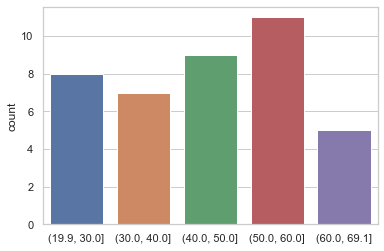

In [112]:
sns.countplot(age_cat2)

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

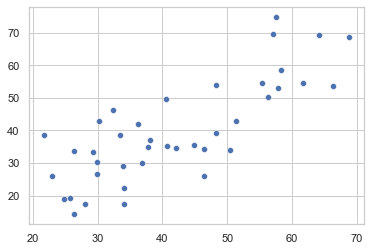

In [113]:
x = np.random.uniform(20, 70, 40)
y = x + np.random.normal(0, 10, 40)
sns.scatterplot(x, y)

In [114]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.7532833020637899, pvalue=2.038271780798518e-08)

In [126]:
x_cat = pd.qcut(x, q=3)
y_cat = pd.qcut(y, q=3)

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

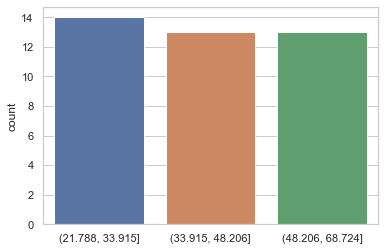

In [127]:
sns.countplot(x_cat)

C:\python\3.9.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

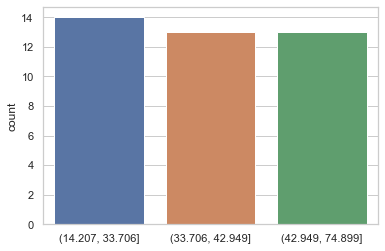

In [128]:
sns.countplot(y_cat)

In [129]:
ct = pd.crosstab(x_cat, y_cat)
ct

col_0,"(14.207, 33.706]","(33.706, 42.949]","(42.949, 74.899]"
row_0,,,
"(21.788, 33.915]",10,3,1
"(33.915, 48.206]",4,7,2
"(48.206, 68.724]",0,3,10


In [130]:
stats.chi2_contingency(ct, correction=False)

(24.465644245864027,
 6.441771692474081e-05,
 4,
 array([[4.9  , 4.55 , 4.55 ],
        [4.55 , 4.225, 4.225],
        [4.55 , 4.225, 4.225]]))

# Задача 1 
Формулировка задачи

In [131]:
df['Курение'].value_counts()

Да     16
Нет    15
Name: Курение, dtype: int64